# Correlation Heatmap

<a href="https://colab.research.google.com/github/andrewm4894/netdata-community/blob/netdata-pandas-example/netdata-agent-api/netdata-pandas/correlation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will use the [netdata-pandas](https://github.com/netdata/netdata-pandas) Python package to pull some data from some demo Netdata servers and make some pretty looking correlation heatmaps, because we all love a good heatmap don't we. 

In [14]:
# if you need to, uncomment below to install netdata-pandas
#!pip install seaborn netdata-pandas==0.0.27

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from netdata_pandas.data import get_data

Lets pull the data from three demo nodes for a subset of charts for the last 15 minutes.

In [16]:
# inputs
hosts = ['london.my-netdata.io', 'cdn77.my-netdata.io', 'octopuscs.my-netdata.io']
charts = ['system.cpu', 'system.load', 'system.io', 'system.ram', 'system.net', 'system.ip', 'system.processes', 'system.intr', 'system.softnet_stat']
before = 0
after = -60*15

In [17]:
# get the data
df = get_data(hosts=hosts, charts=charts, after=after, before=before)
print(df.shape)
df.head()

(2701, 30)


system.cpu|guest  system.cpu|guest_nice  \
host                time_idx                                              
cdn77.my-netdata.io 1603460020               0.0                    0.0   
                    1603460021               0.0                    0.0   
                    1603460022               0.0                    0.0   
                    1603460023               0.0                    0.0   
                    1603460024               0.0                    0.0   

                                system.cpu|iowait  system.cpu|irq  \
host                time_idx                                        
cdn77.my-netdata.io 1603460020          10.050251             0.0   
                    1603460021          47.979800             0.0   
                    1603460022          48.223350             0.0   
                    1603460023          38.693470             0.0   
                    1603460024           0.000000             0.0   

                                system.cpu|nice  system.cpu|softirq  \
host                time_idx                                          
cdn77.my-netdata.io 1603460020              0.0            0.502513   
                    1603460021              0.0            0.000000   
                    1603460022              0.0            0.000000   
                    1603460023              0.0            0.502513   
                    1603460024              0.0            0.000000   

                                system.cpu|steal  system.cpu|system  \
host                time_idx                                          
cdn77.my-netdata.io 1603460020          0.502513           3.015075   
                    1603460021          0.000000           2.525253   
                    1603460022          0.000000           1.522843   
                    1603460023          0.000000           1.507538   
                    1603460024          0.000000           2.010050   

                                system.cpu|user  system.intr|interrupts  ...  \
host                time_idx                                             ...   
cdn77.my-netdata.io 1603460020         0.000000                457.2937  ...   
                    1603460021         0.505050                430.8145  ...   
                    1603460022         0.507614                271.1266  ...   
                    1603460023         0.502513                303.4279  ...   
                    1603460024         0.502513                320.2005  ...   

                                system.processes|running  system.ram|buffers  \
host                time_idx                                                   
cdn77.my-netdata.io 1603460020                       5.0            244.8359   
                    1603460021                       4.0            244.8359   
                    1603460022                       1.0            244.8359   
                    1603460023                       4.0            244.8359   
                    1603460024                       3.0            244.8359   

                                system.ram|cached  system.ram|free  \
host                time_idx                                         
cdn77.my-netdata.io 1603460020           2649.391         388.1953   
                    1603460021           2649.395         388.1641   
                    1603460022           2649.398         388.0117   
                    1603460023           2649.398         387.9531   
                    1603460024           2649.395         387.8008   

                                system.ram|used  system.softnet_stat|dropped  \
host                time_idx                                                   
cdn77.my-netdata.io 1603460020         683.0273                          0.0   
                    1603460021         683.0547                          0.0   
                    1603460022         683.2031                          0.0   
             

## Heatmaps!

Lets just loop over our dataframe for each host and make our heatmap.

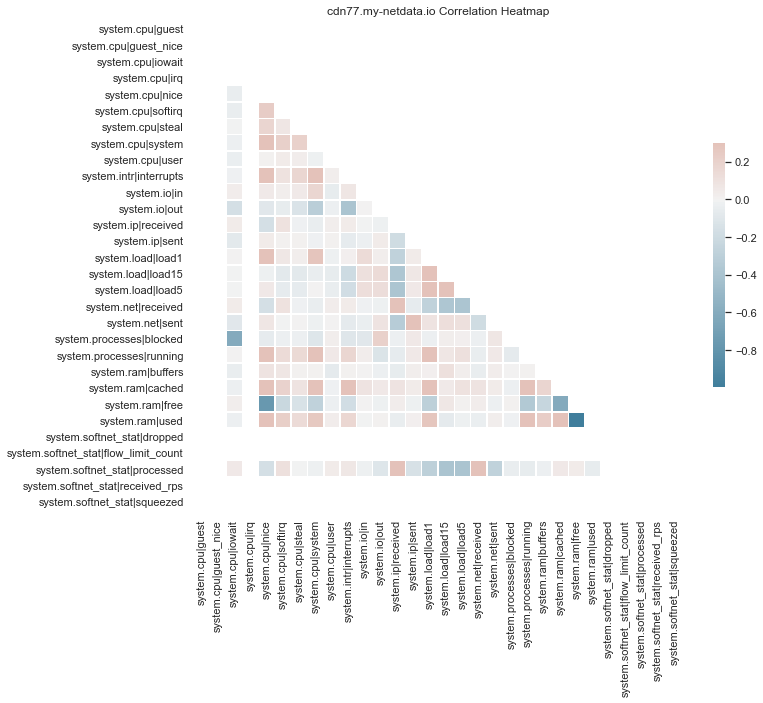

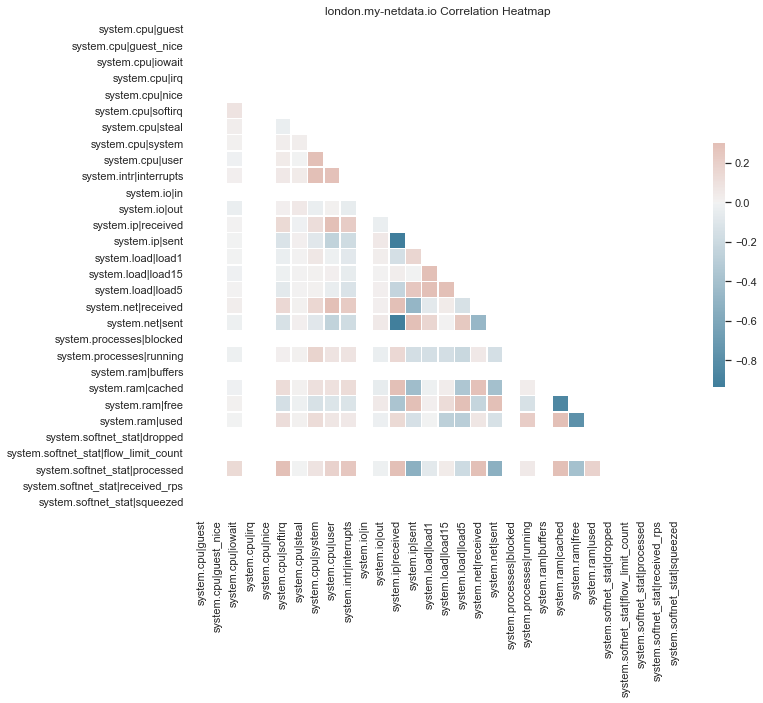

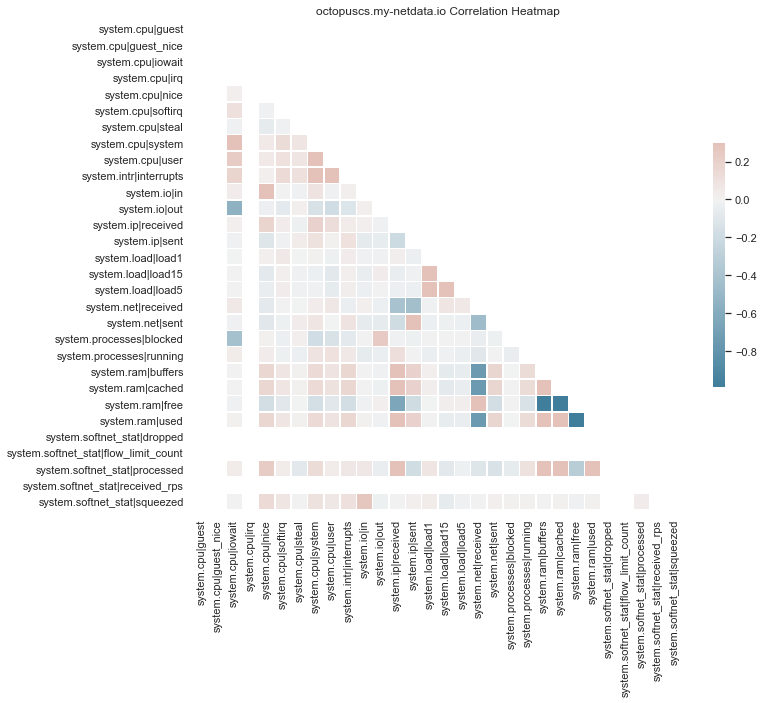

In [18]:
# set some plotting options
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for host in df.index.unique(0):    
    corr = df.loc[host].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(
        corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
        square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title(f'{host} Correlation Heatmap')